# About Me

**Mohammed Imam Uddin Riad**  
**Data Analyst**

**Connect With Me**
- [Portfolio](https://mriadg.github.io/MohammedRiad.com/)
- [LinkedIn](https://www.linkedin.com/in/mohammed-imam-uddin-riad-1b7b682ab/)
- [Email Me](mailto:imamuddinriad@gmail.com)



# Project:Exploratory Data Analysis (EDA) of Patient Health Indicators in Drug Safety and Pharmacovigilance

In [1]:
import pandas as pd

In [2]:
raw_data = pd.read_csv("Drug safety and pharmacovigilance.csv")
df = raw_data.copy()
df.head(5)


,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


# Basic Info

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [4]:
df.shape

(200, 6)

### Summary Statistics 

##### For Numerical Columns

In [5]:
#Summary Statistics for Numerical Columns
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,200.0,44.315000,16.544315,15.000,31.0000,45.0000,58.00,74.000
Na_to_K,200.0,16.084485,7.223956,6.269,10.4455,13.9365,19.38,38.247


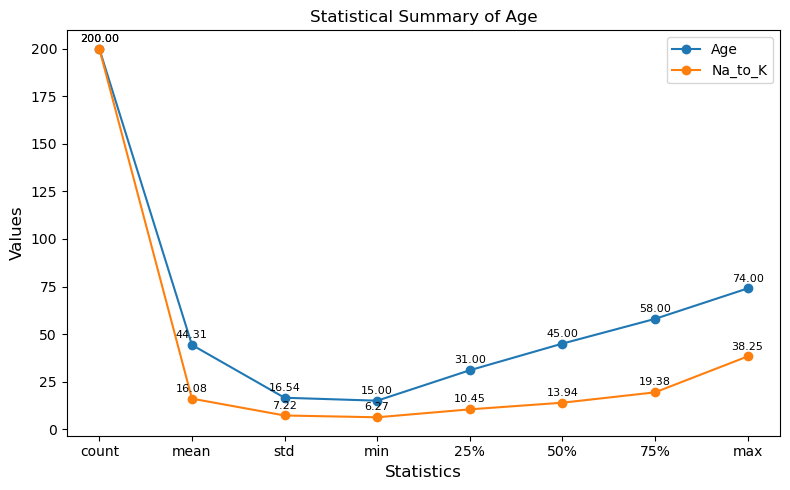

In [39]:
import matplotlib.pyplot as plt

# Plot the line chart
ax = df.describe().plot(kind='line', marker='o', figsize=(8, 5), title='Statistical Summary of Age')

# Add exact data values on each point
for line in ax.get_lines():
    for x, y in zip(line.get_xdata(), line.get_ydata()):
        ax.annotate(f'{y:.2f}', (x, y), textcoords="offset points", xytext=(0, 5), ha='center', fontsize=8)

# Customize labels
plt.xlabel('Statistics', fontsize=12)
plt.ylabel('Values', fontsize=12)

# Display the chart
#plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


##### For Catagorical Columns

In [40]:
#Summary Statistics for Categorical Columns
df.describe(include='object').T

,count,unique,top,freq
Sex,200,2,M,104
BP,200,3,HIGH,77
Cholesterol,200,2,HIGH,103
Drug,200,5,DrugY,91


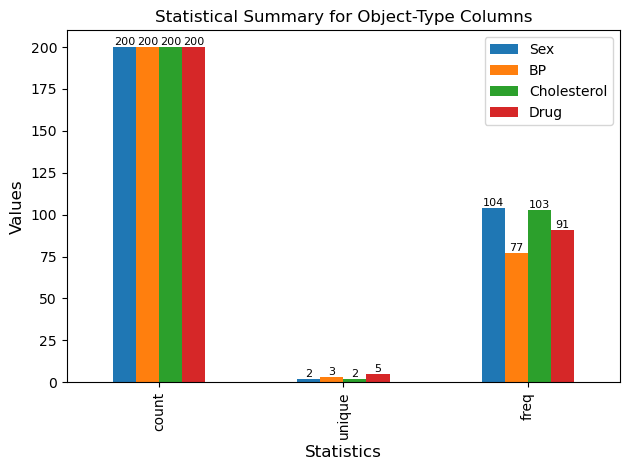

In [77]:
import matplotlib.pyplot as plt

# Extract descriptive statistics for object-type columns
summary = df.describe(include='object').T[['count', 'unique', 'freq']].T

# Plot the bar chart
ax = summary.plot(kind='bar', title='Statistical Summary for Object-Type Columns')

# Add data labels on each bar
for p in ax.patches:  # Iterate through each bar
    ax.annotate(f'{p.get_height():.0f}',  # Get the height of each bar
                (p.get_x() + p.get_width() / 2, p.get_height()),  # Position the label at the center of the bar
                ha='center', va='bottom', fontsize=8)

# Customize the chart
plt.xlabel('Statistics', fontsize=12)
plt.ylabel('Values', fontsize=12)
#plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()

# Show the plot
plt.show()


### Duplicate and Missing Value check 

In [23]:
df.duplicated().any()

False

In [93]:
df.isnull().any()

Age            False
Sex            False
BP             False
Cholesterol    False
Na_to_K        False
Drug           False
dtype: bool

In [80]:
df.columns

Index(['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K', 'Drug'], dtype='object')

In [83]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [101]:
df['Drug'].value_counts(),df['Cholesterol'].value_counts(),df['BP'].value_counts()

(Drug
 DrugY    91
 drugX    54
 drugA    23
 drugC    16
 drugB    16
 Name: count, dtype: int64,
 Cholesterol
 HIGH      103
 NORMAL     97
 Name: count, dtype: int64,
 BP
 HIGH      77
 LOW       64
 NORMAL    59
 Name: count, dtype: int64)

<Axes: >

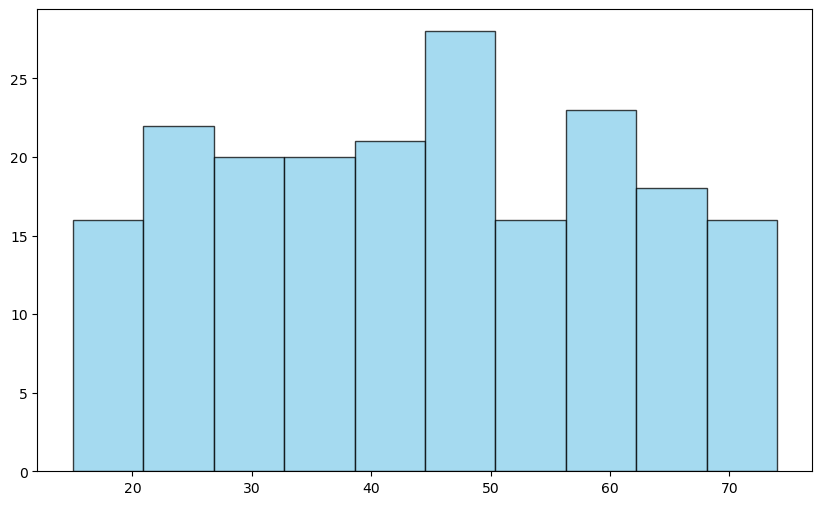

In [140]:
df['Age'].hist( bins=10,           # Number of bins (intervals)
                figsize=(10, 6),   # Size of the figure
                color='skyblue',   # Fill color
               edgecolor='black', # Outline color for bars
                alpha=0.75,        # Transparency of the bars
                grid=False)

<Axes: xlabel='BP'>

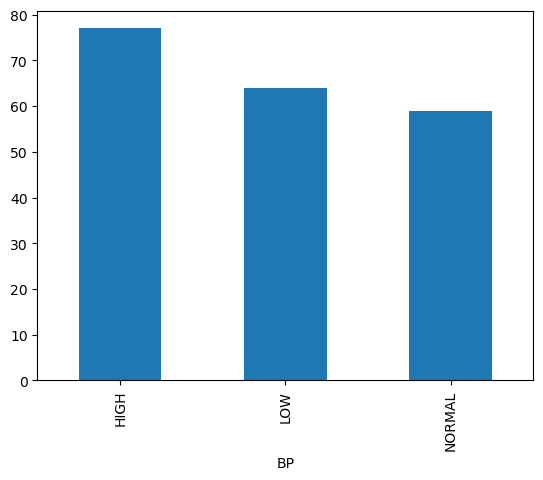

In [113]:
df['BP'].value_counts().plot(kind = 'bar')

<Axes: xlabel='Cholesterol'>

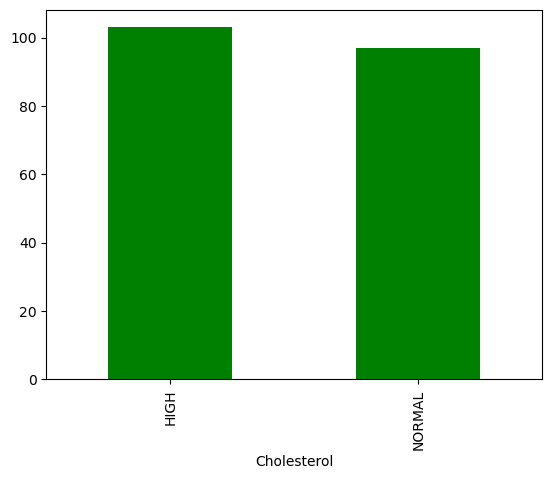

In [133]:
df['Cholesterol'].value_counts().plot(kind = 'bar',color = 'green')

<Axes: xlabel='Drug'>

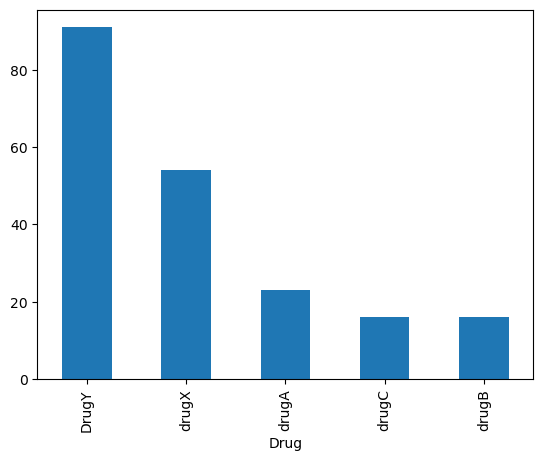

In [137]:
df['Drug'].value_counts().plot(kind = 'bar')

In [154]:
df.groupby(['Sex','Drug']).count()

Age  BP  Cholesterol  Na_to_K
Sex Drug                                
F   DrugY   47  47           47       47
    drugA    9   9            9        9
    drugB    6   6            6        6
    drugC    7   7            7        7
    drugX   27  27           27       27
M   DrugY   44  44           44       44
    drugA   14  14           14       14
    drugB   10  10           10       10
    drugC    9   9            9        9
    drugX   27  27           27       27

<Axes: xlabel='Sex,BP'>

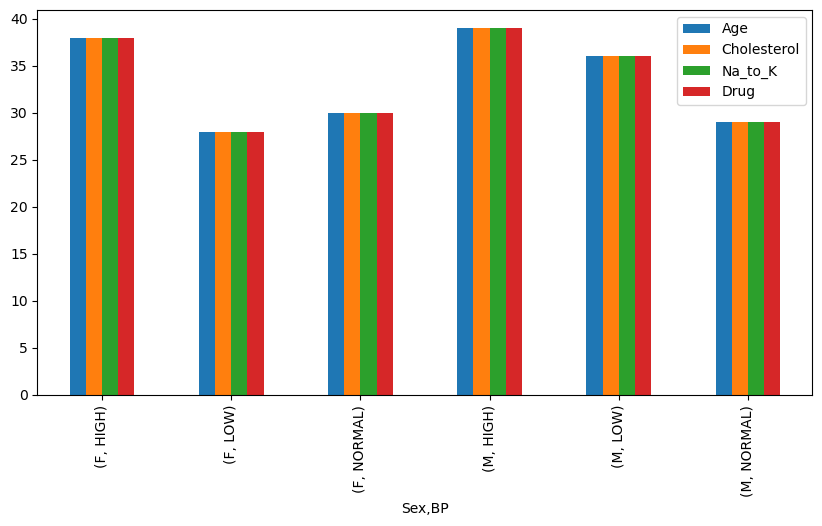

In [163]:
df.groupby(['Sex','BP']).count().plot(kind = 'bar',figsize =(10,5))

<Axes: title={'center': 'Use of Drug'}, xlabel='Drug'>

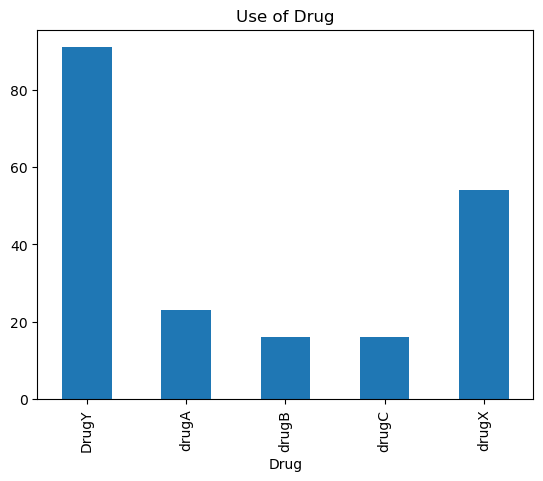

In [176]:
df.groupby('Drug')['Age'].count().plot(kind = 'bar',title ='Use of Drug')

<Axes: title={'center': 'BP Condition for Age Between 20 to 40'}, xlabel='BP'>

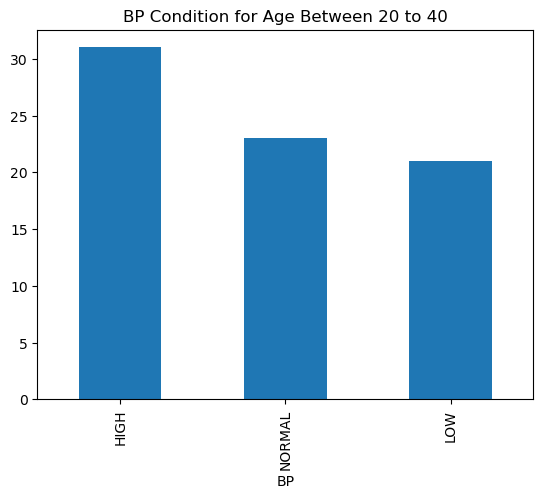

In [198]:
df[(df['Age']>= 20) & (df['Age'] <= 40)]['BP'].value_counts().plot(kind = 'bar',title='BP Condition for Age Between 20 to 40')

In [211]:
df[(df['Age']>= 20) & (df['Age'] <= 40)].groupby(['Cholesterol']).count()

,Age,Sex,BP,Na_to_K,Drug
Cholesterol,,,,,
HIGH,38,38,38,38,38
NORMAL,37,37,37,37,37


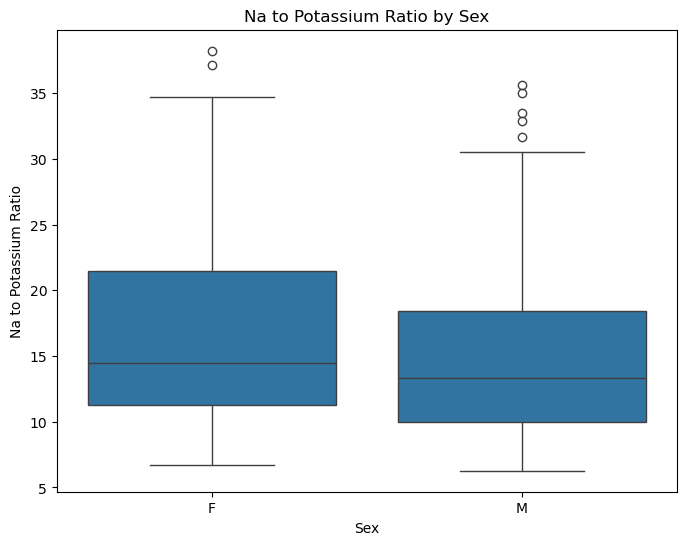

In [212]:
plt.figure(figsize=(8,6))
sns.boxplot(x='Sex', y='Na_to_K', data=df)
plt.title('Na to Potassium Ratio by Sex')
plt.xlabel('Sex')
plt.ylabel('Na to Potassium Ratio')
plt.show()